In [2]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '/content/drive/MyDrive/YBIGTA/24-Winter Session/0116_시각화' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [6]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

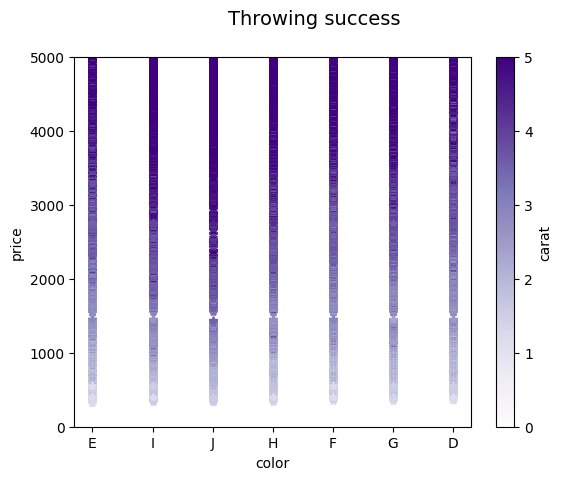

In [ ]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [ ]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

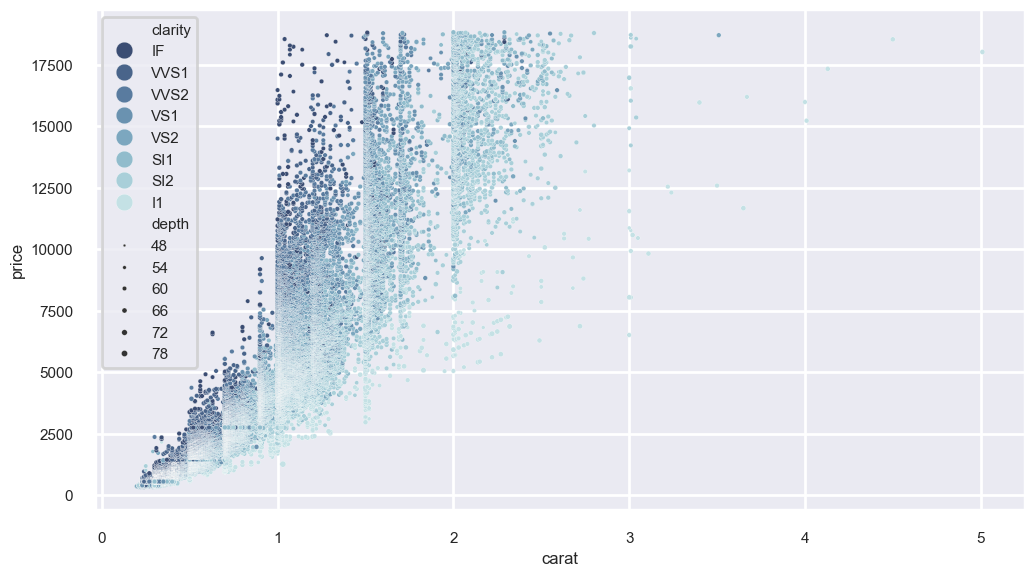

In [ ]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

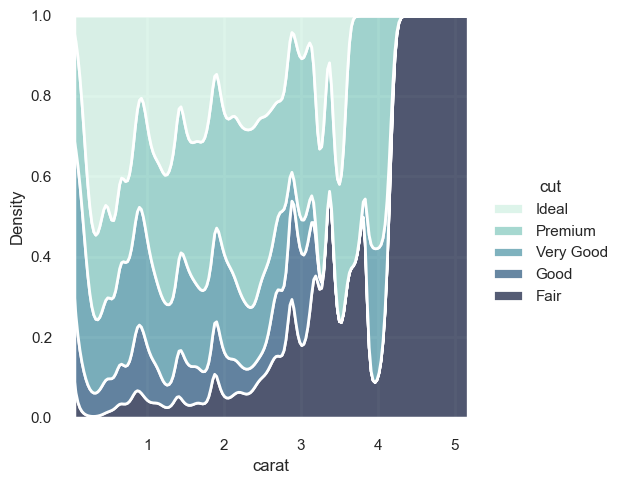

In [ ]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

1번 목적 및 효과:

- Color Price Carat의 상관관계 시각화

- color와 price간의 관계를 메인 그레프로 시각화 있고 carat의 크기에 따라서 색상을 바꿔가며 세변수의 관계를 확인하였다

1번 개선점

- Carat을 색상으로 표현하는것은 사실 구별하기 힘들다고 생각한다 차라리 좀 더 직관적으로 색상을 빼고 점의 크기를 carot 사이즈에 곱해줘서 실제로 더 큰점이 큰 carot의 다이아몬드로 직관적으로 시각화 하는것은 어떨까 생각해봤다

2번 목적 및 효과:

- Scatterplot 함수를 통해 Carat Price Clarity Depth의 특성을 동시에 시각화

- carat은 x축에,price는 y축에 위치하고, clarity는 색상으로, depth는 점의 크기로 표현하였

2번 개선점

- 우선 depth를 점의 크기로 표현했지만 점들사이가 너무 겹치고 그레프 자체가 너무 커서 실제 값과 점의 크기사이의 관계가 잘 보이지도 않고 명확하지도 않아서 시각적으로 이해하기 힘들다고 생각한다

3번 목적 및 효과

- displot 함수를 통해 carat을 히스토그램으로 시각화 하였고, Cut과 Density를 커널 밀도 추정플롯으로 그렸다, cut의 범주에 carat의 분포가 어떻게 달라졌는지 시각화로 나타내었다


3번 개선점

- 그레프를 보면, 실제 데이터 포인트의 위치가 정확하게 나오지 않고 대략적인 흐름을 보여준거라 생각해서 좀 더 사실화된 정보를 시각화 하기 위해 실제 데이터 포인트를 보여주는 plot (Ex. swarm plot)을 사용해보면 어떨까? (물론 더 이쁘진 않을거라 생각한다)

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

- 저는 2번을 선택했습니다, 우선 제가 생각한 가장 큰 문제였던 depth의 시각화가 잘 되어있지 않기때문에 저는 clarity별로 그래프를 각각 시각화 하였습니다, 이렇게 나눴음으로 각 Clarity별로 dppth와 carat에 따른 price의 변화를 선명하게 확인할 수 있었습니다.

- 또한 hexbin plot을 사용했는데 약간 벌집모양으로 해당 점의 분포를 보여주는 시각화가 더 좋다고 판단되어서 사용했습니다.

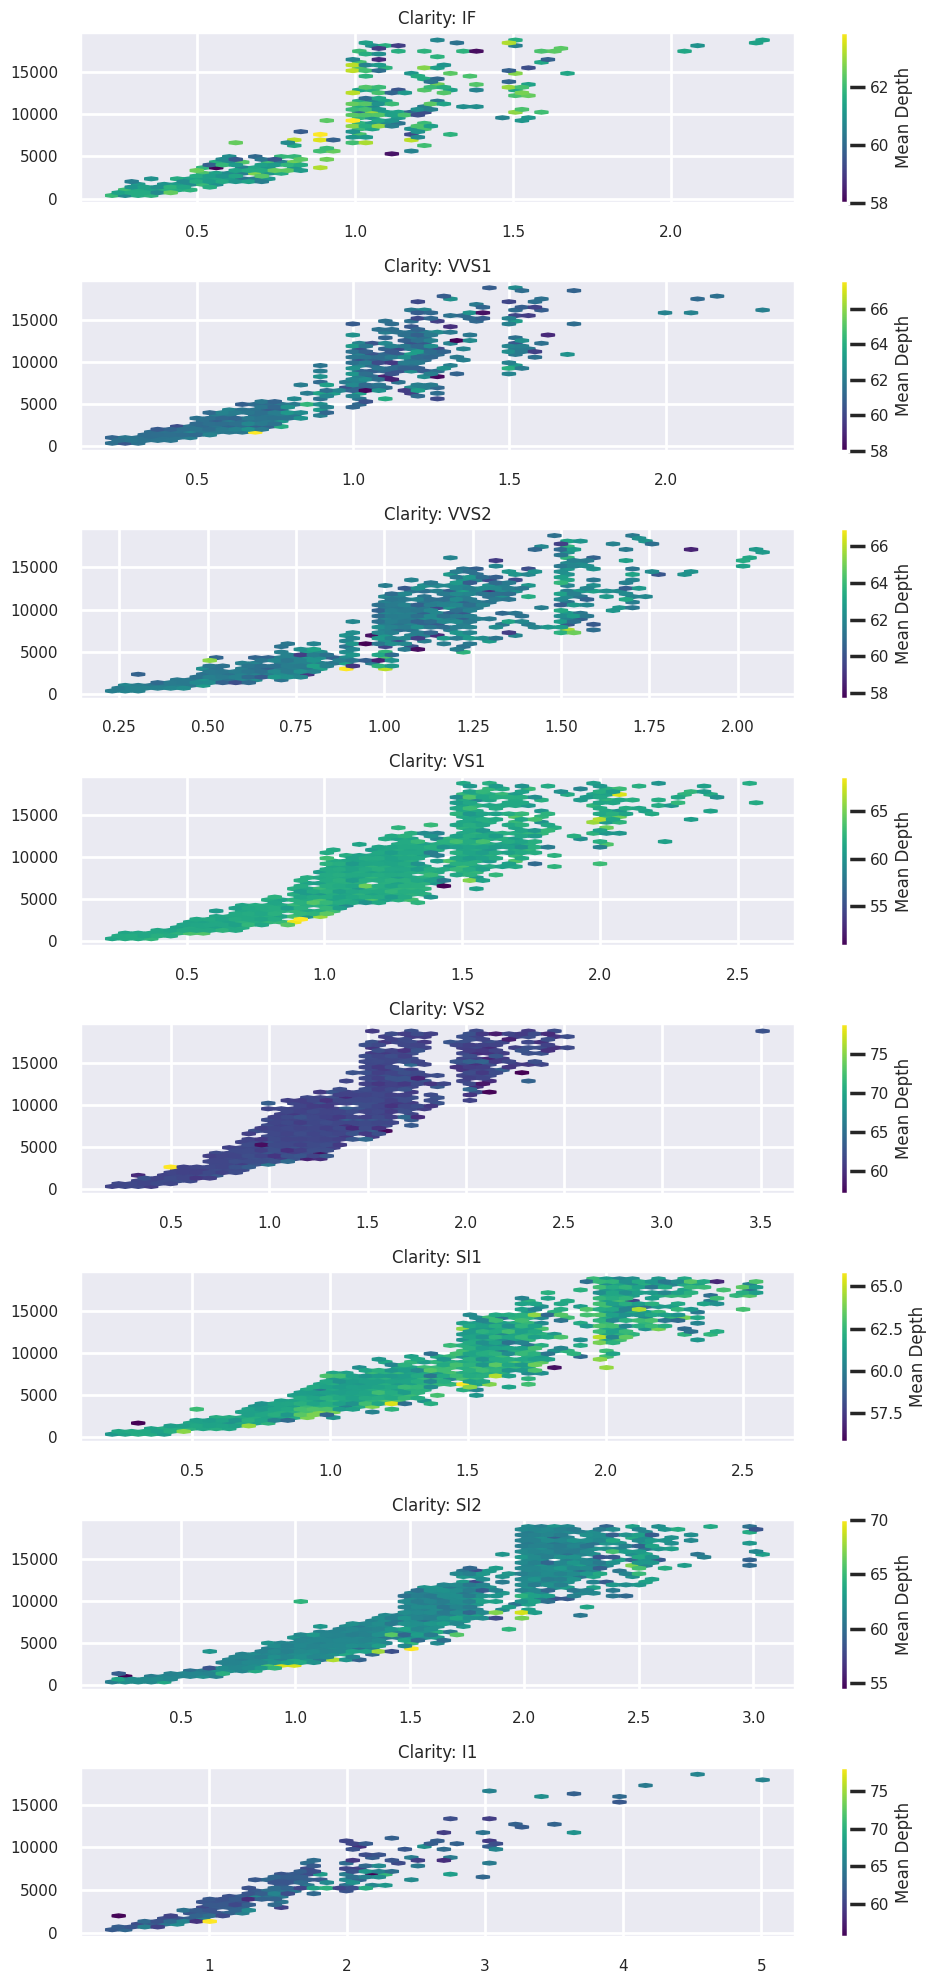

In [20]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# 'clarity'에 대한 서브플롯
fig, axes = plt.subplots(nrows=len(clarity_ranking), figsize=(10, 20))

for clarity, ax in zip(clarity_ranking, axes):
    subset = df[df['clarity'] == clarity]

    # 각 서브플롯에서 'depth'에 따른 색상으로 hexbin plot
    hb = ax.hexbin(subset['carat'], subset['price'], gridsize=50, cmap='viridis', C=subset['depth'], reduce_C_function=np.mean)
    ax.set_title(f'Clarity: {clarity}')
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('Mean Depth')

plt.tight_layout()
plt.show()


# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


1. 스니커즈의 출시 날짜가 판매 가격에 영향을 미치는지 여부를 확인

2. 독립변수는 'Release Date'이며, 종속변수는 'Sale Price'로 설정하였다 출시날짜가 판매가격에 미치는 영향이기에 이렇게 설정하였다

3. 시각화를 위해 우선 출시 날짜를 연도로 변환하고, 연도별 평균 판매 가격을 계산하여 그래프로 그렸다

4. 시각화된 결과를 보니 2015년에 출시한 신발이 가장 비싼것을 확인할 수있고 2017년이 가장 저렴하고 현재(당시2019년)의 신발이 중간 단계 정도에 있는것을 확인 할 수 있었다, 따라서 스니커즈의 가격은 일명 리셀의 가격이 더 높은것을 알 수 있다, 새로 출시한 신발은 아직 시장의 수요가 분명이 있기에 높지만 시간이 좀 지나면 가격이 떨어지는것을 알 수 있다, 따라서 이 회사는 향후 리셀의 방지를 위해 전략을 세워야 한다고 생각한다

In [24]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.
df = pd.read_csv('/content/drive/MyDrive/YBIGTA/24-Winter Session/0116_시각화/StockX-Data-Contest-2019-3.csv', index_col = 0)
df.head()

,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
Order Date,,,,,,,
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [26]:
# 'Sale Price'에서 달러 표시와 콤마를 제거하고 float 유형으로 변환
df['Sale Price'] = df['Sale Price'].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-26-d833419b1f49>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sale Price'] = df['Sale Price'].str.replace('$', '').str.replace(',', '').astype(float)


In [32]:
# 'Release Date'를 날짜 형식으로 변환하고 연도를 추출
df['Release Year'] = pd.to_datetime(df['Release Date']).dt.year

In [33]:
# 연도별 평균 판매 가격을 계산
avg_price_by_year = df.groupby('Release Year')['Sale Price'].mean()

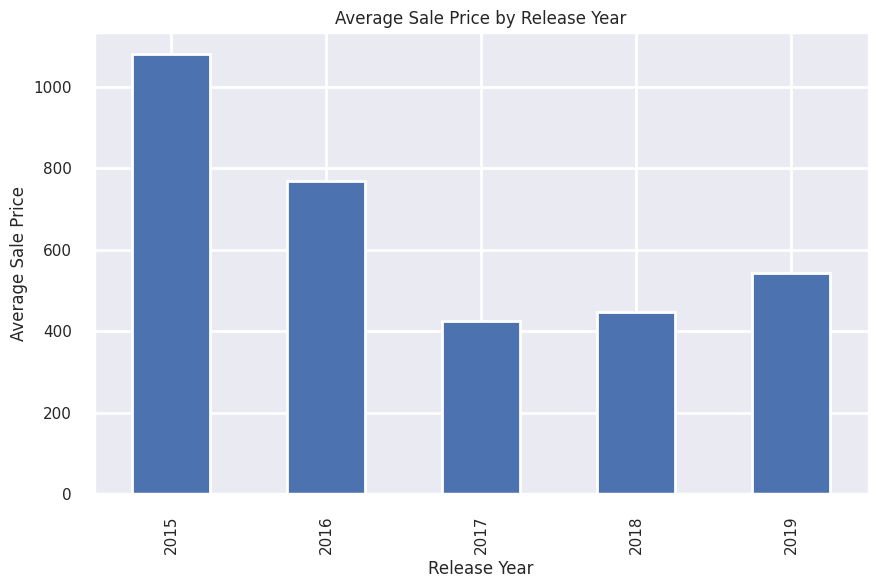

In [34]:
# 그래프 생성
plt.figure(figsize=(10, 6))
avg_price_by_year.plot(kind='bar')
plt.title('Average Sale Price by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Sale Price')
plt.show()